This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

이 데이터는 코비 브라이언트 20년 선수생활의 경기 슟 시도에 대한 위치 그리고 환경을 포함하고 있습니다.

당신의 임무는 슟의 성규 여부를 예측하는 것 입니다.

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

출제자는 5000개의 슟 성공 결과를 삭제했습니다.
그 5000개의 슟의 성공 여부를 예측해서 제출해주세요. 
sample submission file을 제공해 드렸습니다.

To avoid leakage, your method should only train on events that occurred prior to the shot for which you are predicting! Since this is a playground competition with public answers, it's up to you to abide by this rule.

데이터 유출을 피하고, 이 대회는 재미 위주의 대회이기 때문에 룰을 따르는 것은 당신에게 달려있습니다.

The field names are self explanatory and contain the following attributes:

* action_type : 상세한 슟 타입 (점프 슟, 레이업 슟)
* combined_shot_type : 큰 범주의 슟 타입
* game_event_id : 경기 i
* game_id
* lat : 위도
* loc_x 
* loc_y
* lon : 경도
* minutes_remaining : 남은 시간
* period : 쿼터 (1/2/3/4/ over time)
* playoffs : playoff 여부
* season : 시즌정보
* seconds_remaining : shot clock
* shot_distance: 골대 까지의 거리
* shot_made_flag (this is what you are predicting): 성공/실패
* shot_type: 2점슟 / 3점슟
* shot_zone_area / 슟 zone area
* shot_zone_basic / 슟 zone basic
* shot_zone_range / 슟 zonre range(범위)
* team_id / 팀 id
* team_name / 팀 name
* game_date / 게임날짜
* matchup / 경기
* opponent / 상대 팀
* shot_id / 경기에서 슟 id


In [183]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc

# os x(mac os) 한글 font 
rc('font', family='AppleGothic')

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [184]:
train = pd.read_csv("data.csv")

In [185]:
train.shape

(30697, 25)

In [186]:
train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [188]:
# 이 문제에 null 값은 5000개의 우리가 예상해야 하는 flas
train.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [189]:
# 학습 시킬 데이터만 남기고 삭제.
train = train.dropna()

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [191]:
# discrete 한 데이터들을 bar 그래프로 시각화

def bar_chart(feature, ax=None):
    success = train[train['shot_made_flag']==1][feature].value_counts()
    fail = train[train['shot_made_flag']==0][feature].value_counts()
    df = pd.DataFrame([success, fail])
    df.index = ['Success', 'Fail']
    df.plot(kind='bar', stacked=True, ax=ax)

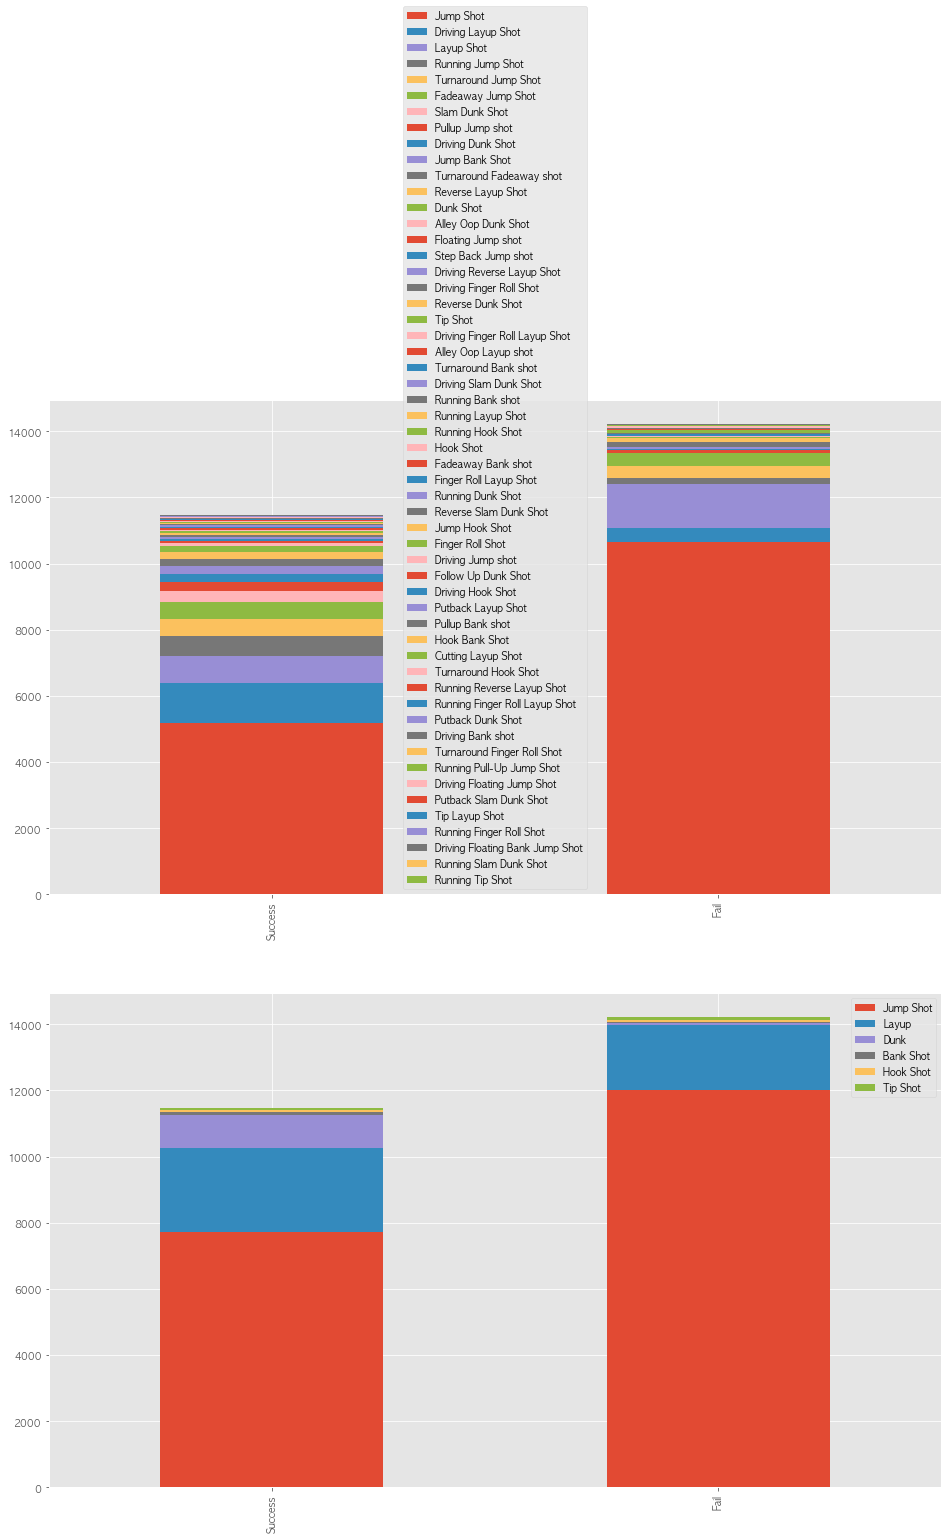

In [192]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)

figure.set_size_inches(16,20)

bar_chart('action_type', ax1)
bar_chart('combined_shot_type', ax2)

In [193]:
# 슟 종류 별 성공률 

def make_probability(feature, column):
    success = train[train['shot_made_flag']==1][train[feature]==column][feature].value_counts()
    fail = train[train['shot_made_flag']==0][train[feature]==column][feature].value_counts()
    return (success)/(success+fail)

In [194]:
print(make_probability("combined_shot_type", "Jump Shot"))
print(make_probability("combined_shot_type", "Layup"))
print(make_probability("combined_shot_type", "Dunk"))
print(make_probability("combined_shot_type", "Bank Shot"))
print(make_probability("combined_shot_type", "Hook Shot"))
print(make_probability("combined_shot_type", "Tip Shot"))

Jump Shot    0.391071
Name: combined_shot_type, dtype: float64
Layup    0.565093
Name: combined_shot_type, dtype: float64
Dunk    0.92803
Name: combined_shot_type, dtype: float64
Bank Shot    0.791667
Name: combined_shot_type, dtype: float64
Hook Shot    0.535433
Name: combined_shot_type, dtype: float64
Tip Shot    0.348684
Name: combined_shot_type, dtype: float64


## shoot type 별 분석

### 코비의 슟 성공률은 덩크 슟 > 뱅크 슟 > 레이업 > 훅 > 점프 슟 > 팁 슟

In [195]:
train[train['shot_made_flag']==1]['action_type'].value_counts() / (train[train['shot_made_flag']==1]['action_type'].value_counts()+train[train['shot_made_flag']==0]['action_type'].value_counts())

Alley Oop Dunk Shot                0.947368
Alley Oop Layup shot               0.716418
Cutting Layup Shot                 0.666667
Driving Bank shot                  0.666667
Driving Dunk Shot                  0.976654
Driving Finger Roll Layup Shot     0.881356
Driving Finger Roll Shot           0.852941
Driving Floating Bank Jump Shot         NaN
Driving Floating Jump Shot         0.333333
Driving Hook Shot                  0.615385
Driving Jump shot                  0.434783
Driving Layup Shot                 0.741400
Driving Reverse Layup Shot         0.746988
Driving Slam Dunk Shot             0.976744
Dunk Shot                          0.778802
Fadeaway Bank shot                 0.888889
Fadeaway Jump Shot                 0.574541
Finger Roll Layup Shot             0.821429
Finger Roll Shot                   0.461538
Floating Jump shot                 0.720430
Follow Up Dunk Shot                0.900000
Hook Bank Shot                          NaN
Hook Shot                       

In [196]:
train[train['shot_made_flag']==1]['action_type'].value_counts()

Jump Shot                          5177
Driving Layup Shot                 1207
Layup Shot                          830
Running Jump Shot                   582
Turnaround Jump Shot                533
Fadeaway Jump Shot                  501
Slam Dunk Shot                      328
Pullup Jump shot                    291
Driving Dunk Shot                   251
Jump Bank Shot                      224
Turnaround Fadeaway shot            214
Reverse Layup Shot                  212
Dunk Shot                           169
Alley Oop Dunk Shot                  90
Floating Jump shot                   67
Step Back Jump shot                  67
Driving Reverse Layup Shot           62
Driving Finger Roll Shot             58
Reverse Dunk Shot                    56
Tip Shot                             53
Driving Finger Roll Layup Shot       52
Alley Oop Layup shot                 48
Turnaround Bank shot                 46
Driving Slam Dunk Shot               42
Running Bank shot                    36


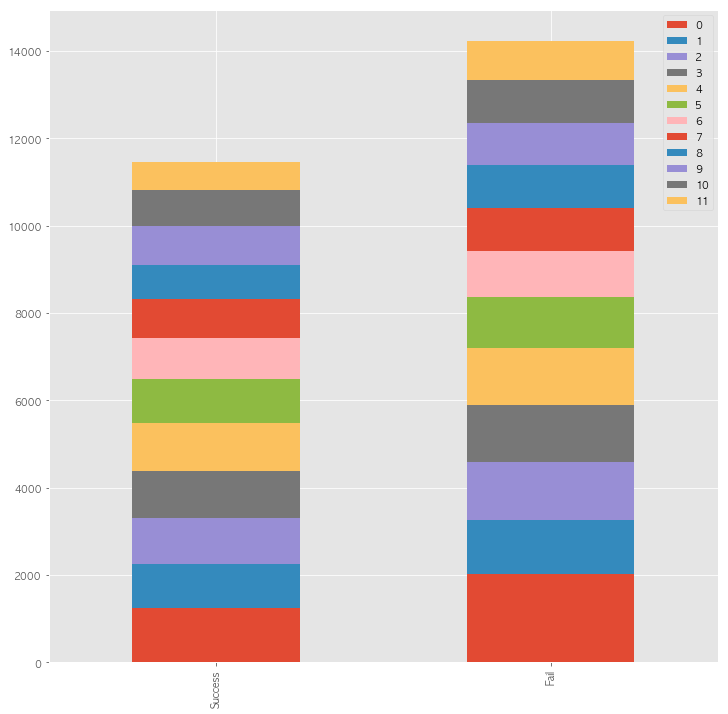

In [197]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(12,12)

bar_chart('minutes_remaining', ax1)

In [198]:
for i in range(12):
    print('쿼터 종료 {}전'.format(i), make_probability('minutes_remaining', i))

쿼터 종료 0전 0    0.380542
Name: minutes_remaining, dtype: float64
쿼터 종료 1전 1    0.44723
Name: minutes_remaining, dtype: float64
쿼터 종료 2전 2    0.447247
Name: minutes_remaining, dtype: float64
쿼터 종료 3전 3    0.451409
Name: minutes_remaining, dtype: float64
쿼터 종료 4전 4    0.452243
Name: minutes_remaining, dtype: float64
쿼터 종료 5전 5    0.465966
Name: minutes_remaining, dtype: float64
쿼터 종료 6전 6    0.469965
Name: minutes_remaining, dtype: float64
쿼터 종료 7전 7    0.481876
Name: minutes_remaining, dtype: float64
쿼터 종료 8전 8    0.434534
Name: minutes_remaining, dtype: float64
쿼터 종료 9전 9    0.479744
Name: minutes_remaining, dtype: float64
쿼터 종료 10전 10    0.45495
Name: minutes_remaining, dtype: float64
쿼터 종료 11전 11    0.423476
Name: minutes_remaining, dtype: float64


In [199]:
train.head(3)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4


In [200]:
# lat lon 같은경우는 사실 같은 경기에서는 의미가 크게 없음 슟거리와 슟 위치로 커버할 수 있다고 생각됨.

In [201]:
train.drop('lat', axis=1, inplace=True)
train.drop('lon', axis=1, inplace=True)

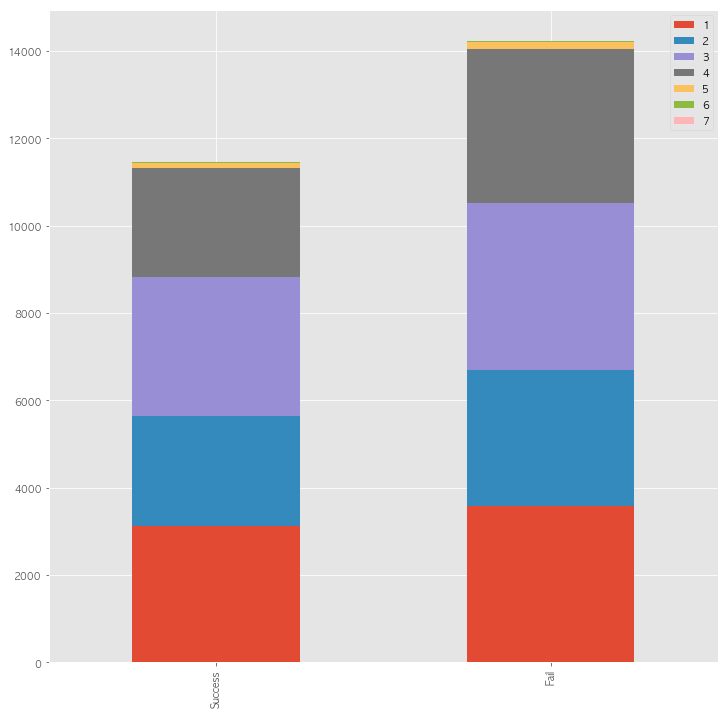

In [202]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(12,12)

bar_chart('period', ax1)


In [203]:

for i in range(1,8):
    print('{}쿼터 슟 성공률'.format(i), make_probability('period', i))

1쿼터 슟 성공률 1    0.465672
Name: period, dtype: float64
2쿼터 슟 성공률 2    0.448802
Name: period, dtype: float64
3쿼터 슟 성공률 3    0.453442
Name: period, dtype: float64
4쿼터 슟 성공률 4    0.413702
Name: period, dtype: float64
5쿼터 슟 성공률 5    0.442857
Name: period, dtype: float64
6쿼터 슟 성공률 6    0.466667
Name: period, dtype: float64
7쿼터 슟 성공률 7    0.428571
Name: period, dtype: float64


playoff 1    0.444651
Name: playoffs, dtype: float64
non-playoff 0    0.44642
Name: playoffs, dtype: float64


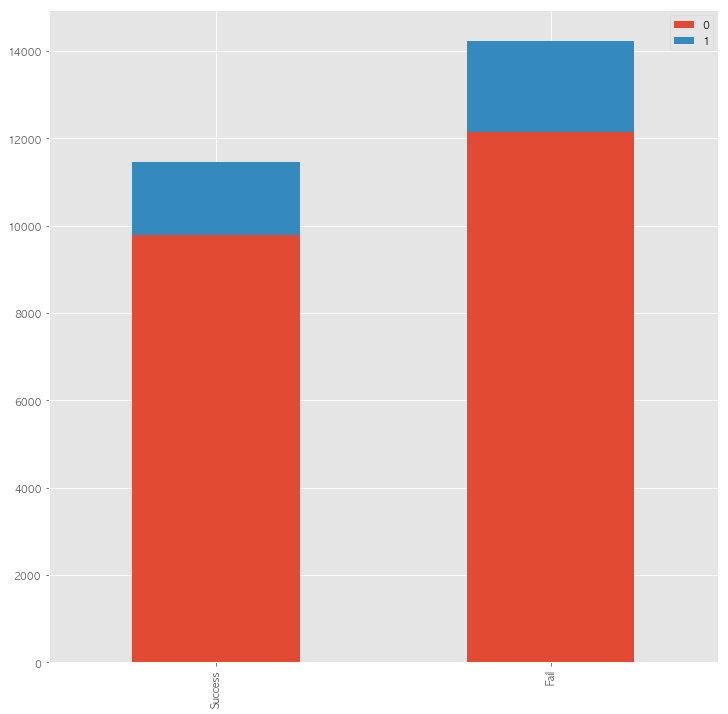

In [204]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(12,12)

bar_chart('playoffs', ax1)

print('playoff', make_probability('playoffs',1))
print('non-playoff', make_probability('playoffs',0))

1996-97    0.422977
1997-98    0.430864
1998-99    0.458824
1999-00    0.460366
2000-01    0.466667
2001-02    0.458431
2002-03    0.436285
2003-04    0.433260
2004-05    0.436557
2005-06    0.453742
2006-07    0.457885
2007-08    0.468389
2008-09    0.467855
2009-10    0.453725
2010-11    0.446417
2011-12    0.425847
2012-13    0.457831
2013-14    0.406780
2014-15    0.376054
2015-16    0.356223
Name: season, dtype: float64


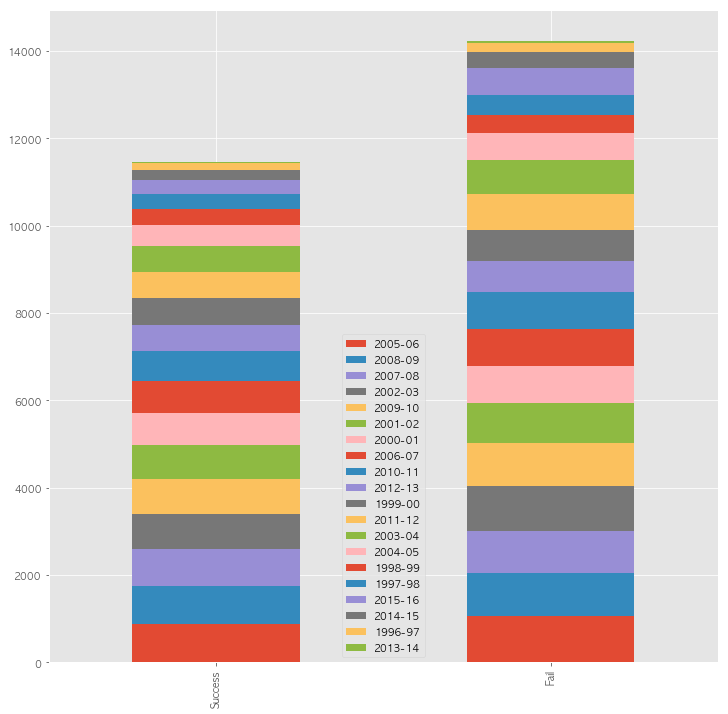

In [205]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(12,12)

bar_chart('season', ax1)
print(train[train['shot_made_flag']==1]['season'].value_counts() / (train[train['shot_made_flag']==1]['season'].value_counts()+train[train['shot_made_flag']==0]['season'].value_counts()))

[Text(0.5,1,'shoot zone range')]

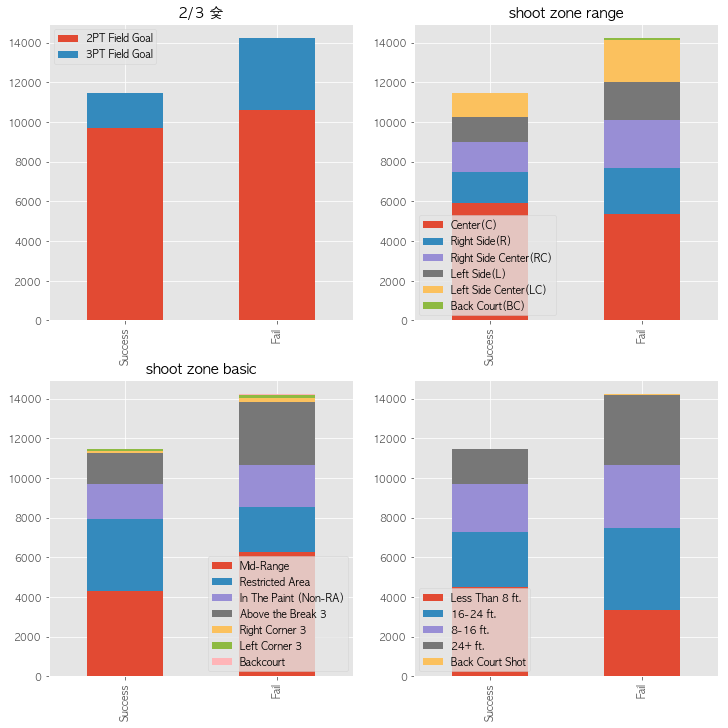

In [206]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,12)

bar_chart('shot_type', ax1)
bar_chart('shot_zone_area', ax2)
bar_chart('shot_zone_basic', ax3)
bar_chart('shot_zone_range', ax4)

ax1.set(title='2/3 슟')
ax2.set(title='shoot zone area')
ax3.set(title='shoot zone basic')
ax2.set(title='shoot zone range')


In [207]:
train.head(2)

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


[Text(0.5,1,'싱대 팀')]

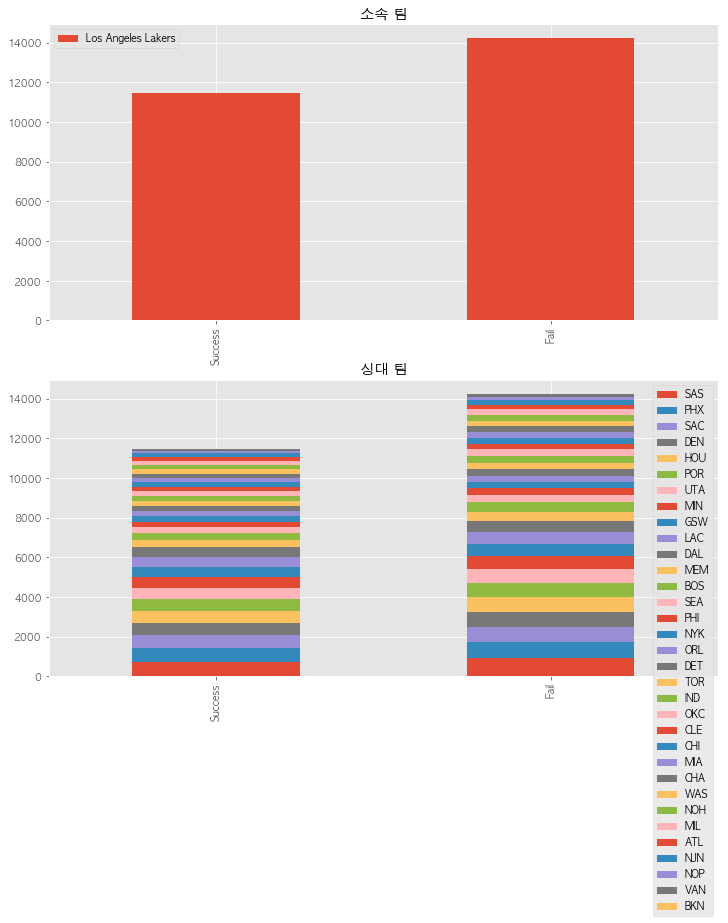

In [208]:
figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(12,12)

bar_chart('team_name', ax1)
bar_chart('opponent', ax2)


ax1.set(title='소속 팀')
ax2.set(title='싱대 팀')


In [209]:
print(train[train['shot_made_flag']==1]['opponent'].value_counts() / (train[train['shot_made_flag']==1]['opponent'].value_counts()+train[train['shot_made_flag']==0]['opponent'].value_counts()))

ATL    0.452055
BKN    0.400000
BOS    0.411239
CHA    0.436000
CHI    0.430233
CLE    0.439689
DAL    0.454017
DEN    0.457840
DET    0.441227
GSW    0.464567
HOU    0.434596
IND    0.400958
LAC    0.460894
MEM    0.450057
MIA    0.429400
MIL    0.410256
MIN    0.444627
NJN    0.436019
NOH    0.450526
NOP    0.407666
NYK    0.477032
OKC    0.418895
ORL    0.435430
PHI    0.449420
PHX    0.464495
POR    0.465170
SAC    0.465283
SAS    0.436508
SEA    0.452450
TOR    0.464029
UTA    0.444265
VAN    0.470588
WAS    0.427146
Name: opponent, dtype: float64


In [210]:
train.drop('team_name', axis=1, inplace=True)


In [211]:
train.head(2)

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,2000-10-31,LAL @ POR,POR,3


In [212]:
train['game_date'] = train['game_date'].str[:-3]

In [213]:
train['game_date'] = train['game_date'].str[:-3]

In [214]:
train['year'] = train['game_date']

In [215]:
train.drop('game_date', axis=1, inplace=True)

In [216]:
def print_probability(column):
    print(train[train['shot_made_flag']==1][column].value_counts() / (train[train['shot_made_flag']==1][column].value_counts()+train[train['shot_made_flag']==0][column].value_counts()))

1996    0.376812
1997    0.430400
1998    0.432866
1999    0.460834
2000    0.471445
2001    0.462419
2002    0.441935
2003    0.432214
2004    0.428951
2005    0.448303
2006    0.467952
2007    0.450246
2008    0.476932
2009    0.468322
2010    0.439457
2011    0.448179
2012    0.436763
2013    0.448763
2014    0.379771
2015    0.348884
2016    0.362205
Name: year, dtype: float64


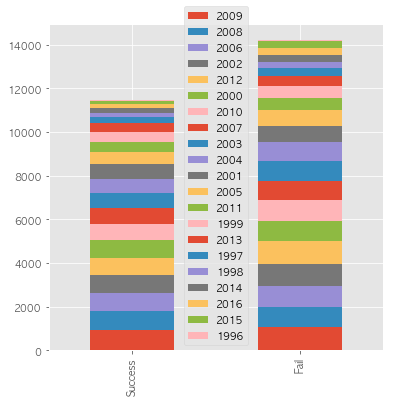

In [217]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(6,6)
bar_chart('year', ax1)
print_probability('year')

In [218]:
# continous 데이터 분석# contin 

def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="shot_made_flag", aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()

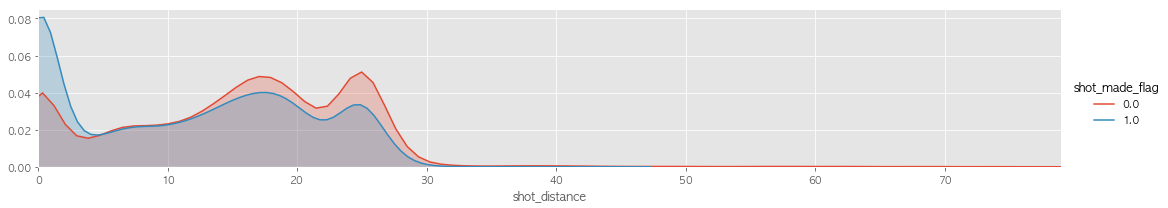

In [219]:
draw_facetgrid("shot_distance")

In [220]:
train.head(1)

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,matchup,opponent,shot_id,year
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,LAL @ POR,POR,2,2000


In [221]:
# 데이터 조합
# 년도별 슟 별 성공률
# 상대 팀 별 슟 별 성공률


In [222]:
def print_probability_with_two_column(column1, column2, data):
    print(train[train['shot_made_flag']==1][train[column2]==data][column1].value_counts() / (train[train['shot_made_flag']==1][train[column2]==data][column1].value_counts()+train[train['shot_made_flag']==0][train[column2]==data][column1].value_counts()))
    
    

In [223]:
for i in range(1996, 2017):
    print_probability_with_two_column('combined_shot_type', 'year',i)

Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: float64)
Series([], Name: combined_shot_type, dtype: fl

In [224]:
train.groupby(['year', 'combined_shot_type'])['shot_made_flag'].sum() / (train.groupby(['year', 'combined_shot_type'])['shot_made_flag'].count())

year  combined_shot_type
1996  Dunk                  0.666667
      Jump Shot             0.391304
      Layup                 0.300000
1997  Dunk                  0.954545
      Hook Shot             0.000000
      Jump Shot             0.358354
      Layup                 0.493671
      Tip Shot              0.111111
1998  Dunk                  0.897436
      Hook Shot             0.333333
      Jump Shot             0.347826
      Layup                 0.515625
      Tip Shot              0.285714
1999  Dunk                  0.927273
      Hook Shot             0.375000
      Jump Shot             0.378682
      Layup                 0.635417
      Tip Shot              0.466667
2000  Dunk                  0.941176
      Hook Shot             0.666667
      Jump Shot             0.405842
      Layup                 0.583643
      Tip Shot              0.380952
2001  Dunk                  0.906977
      Hook Shot             1.000000
      Jump Shot             0.407407
      Layup  

In [225]:
train = pd.read_csv("data.csv")

In [226]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier


test_data = train[['loc_x', 'loc_y', 'shot_made_flag']]
test_data = test_data.dropna()
def test_it(data):
    clf = RandomForestClassifier(n_jobs=-1)  # A super simple classifier
    return cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,
                           scoring='log_loss', cv=10
                          )
test_it(test_data).mean()

-2.311662475575763

In [227]:
# If we take only the y location into consideration, we should see some improvement
data = train[['loc_y', 'shot_made_flag']]
data = data.dropna()
test_it(data).mean()

-0.718565729712777

In [228]:
# That does make improvements, though a more accurate measure of what we are
# trying to do here would be shot_distance
data = train[['shot_distance', 'shot_made_flag']]
data = data.dropna()
test_it(data).mean()

-0.6714108288156109

In [229]:
# Not much there, except perhapsin the < 5 second zone
# Let's test it
data = train[['seconds_remaining', 'shot_distance', 'shot_made_flag']].dropna()
test_it(data).mean()

-0.9125372660665668

In [230]:
# Not much variation there either. Kobe is really consistent.
# let's see season
print(train.season.unique())
train['season_start_year'] = train.season.str.split('-').str[0]
train['season_start_year'] = train['season_start_year'].astype(int)


['2000-01' '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07'
 '2007-08' '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14'
 '2014-15' '2015-16' '1996-97' '1997-98' '1998-99' '1999-00']


In [231]:
# Although we are seeing some seasonality here, let's not forget the scale.
# To be sure, we add this and test our classifier

data = train[['season_start_year', 'shot_distance', 'shot_made_flag']].dropna()
test_it(data).mean()

-1.403676267835365

In [232]:
action_map = {action: i for i, action in enumerate(train.action_type.unique())}
train['action_type_enumerated'] = train.action_type.map(action_map)


In [233]:
train['action_type_enumerated']

0        0
1        0
2        0
3        0
4        1
5        0
6        2
7        0
8        0
9        3
10       0
11       0
12       3
13       0
14       0
15       0
16       4
17       0
18       0
19       4
20       0
21       0
22       3
23       3
24       3
25       2
26       0
27       0
28       0
29       0
        ..
30667    0
30668    0
30669    0
30670    3
30671    4
30672    0
30673    0
30674    0
30675    0
30676    3
30677    0
30678    4
30679    2
30680    9
30681    0
30682    3
30683    0
30684    0
30685    0
30686    3
30687    0
30688    0
30689    0
30690    0
30691    4
30692    0
30693    9
30694    3
30695    0
30696    0
Name: action_type_enumerated, Length: 30697, dtype: int64

In [234]:
data = train[['action_type_enumerated', 'shot_distance', 'shot_made_flag']].dropna()
x = test_it(data)
print(x.mean())

-0.693893754981946


In [235]:
opponent_map = {opp: i for i, opp in enumerate(train.opponent.unique())}
train['opponent_enumerated'] = train.opponent.map(opponent_map)

In [236]:
data = train[['action_type_enumerated', 'shot_distance',
           'shot_made_flag', 'opponent_enumerated']].dropna()
test_it(data).mean()

-1.290006394860324

In [237]:
train['away'] = train.matchup.str.contains('@')
data = train[['action_type_enumerated', 'shot_distance',
           'shot_made_flag', 'away']].dropna()
test_it(data).mean()

-0.7673738817800813

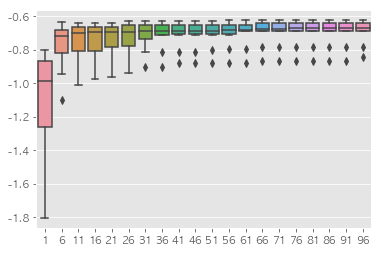

In [238]:
data = train[['action_type_enumerated', 'shot_distance',
           'shot_made_flag', 'away']].dropna()

# We see how score improves with estimators.
estimators, scores = list(range(1, 100, 5)), []
for i in estimators:
    clf = RandomForestClassifier(n_jobs=-1, n_estimators=i, random_state=2016)
    x = cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,
                              scoring='log_loss', cv=10)
    scores.append(x)
x = [i for i in estimators for j in range(10)]
sns.boxplot(x, np.array(scores).flatten())

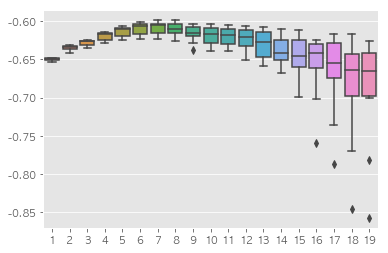

In [239]:
depth, scores = list(range(1, 20, 1)), []
for i in depth:
    clf = RandomForestClassifier(n_jobs=-1, n_estimators=70, max_depth=i, random_state=2016)
    x = cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,
                              scoring='log_loss', cv=10)
    scores.append(x)
x = [i for i in depth for j in range(10)]
sns.boxplot(x, np.array(scores).flatten())

In [240]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=70, max_depth=7, random_state=2016) # a more powerful classifier

train_data = train.loc[~train.shot_made_flag.isnull(), ['action_type_enumerated',
                                             'shot_distance', 'shot_made_flag', 'away']]
test = train.loc[train.shot_made_flag.isnull(), ['action_type_enumerated',
                                           'shot_distance', 'shot_id', 'away']]
# Impute
mode = test.action_type_enumerated.mode()[0]
test.action_type_enumerated.fillna(mode, inplace=True)

# Train and predict
clf.fit(train_data.drop('shot_made_flag', 1), train_data.shot_made_flag)
predictions = clf.predict_proba(test.drop('shot_id', 1))

In [244]:
import datetime
submission = pd.DataFrame({'shot_id': test.shot_id,
                           'shot_made_flag': predictions[:, 1]})
submission[['shot_id', 'shot_made_flag']].to_csv('submission{}.csv'.format(datetime.datetime.now()), index=False)